In [8]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm ; reload(lstm)
import time

In [2]:
#Code mostly from - http://www.jakob-aungiers.com/articles/a/LSTM-Neural-Network-for-Time-Series-Prediction
#Get an idea of the data 
import pandas as pd
pd.read_csv("sp500.csv").head(10)


,1455.219971
0,1399.420044
1,1402.109985
2,1403.449951
3,1441.469971
4,1457.599976
5,1438.560059
6,1432.250000
7,1449.680054
8,1465.150024
9,1455.140015


In [3]:
#Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [4]:
#Build Model
model = Sequential()

model.add(LSTM(input_dim=1,output_dim=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print 'compilation time : ', time.time() - start

compilation time :  0.0145881175995


In [5]:
#Train the model
model.fit(
    X_train,
    y_train,
    batch_size=52,
    nb_epoch=1,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 15s - loss: 8.5084e-04 - val_loss: 7.4394e-04


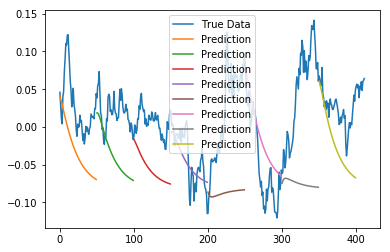

In [16]:
#Plot predictions
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

In [ ]:
lstm.plot_results_multiple(predictions, y_test, 50)